In [1]:
#https://www.kaggle.com/karanjakhar/facial-keypoint-detection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [2]:
Train_Dir = '/content/drive/MyDrive/AI/Detection/FacialKeypoints/training.csv'
Test_Dir = '/content/drive/MyDrive/AI/Detection/FacialKeypoints/test.csv'
lookid_dir = '/content/drive/MyDrive/AI/Detection/FacialKeypoints/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)
os.listdir('/content/drive/MyDrive/AI/Detection/FacialKeypoints')

['training.csv', 'test.csv', 'IdLookupTable.csv', 'SampleSubmission.csv']

In [3]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


In [4]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [5]:
train_data.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True)

In [6]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [7]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [8]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

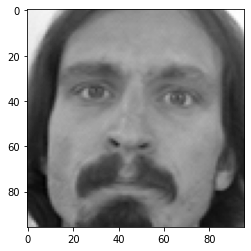

In [9]:
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

In [10]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [11]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

In [12]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [13]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        288       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                      

In [14]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [15]:
model.fit(X_train,y_train,epochs = 20,batch_size = 256,validation_split = 0.2)

Epoch 1/20
23/23 [==============================] - 528s 23s/step - loss: 338.1599 - mae: 11.7617 - val_loss: 754.9300 - val_mae: 25.5187
Epoch 2/20
23/23 [==============================] - 495s 22s/step - loss: 31.6041 - mae: 4.3705 - val_loss: 242.0198 - val_mae: 14.3527
Epoch 3/20
23/23 [==============================] - 494s 21s/step - loss: 26.3438 - mae: 3.9732 - val_loss: 130.0298 - val_mae: 10.4061
Epoch 4/20
23/23 [==============================] - 471s 20s/step - loss: 23.4972 - mae: 3.7308 - val_loss: 91.0821 - val_mae: 8.6717
Epoch 5/20
23/23 [==============================] - 465s 20s/step - loss: 21.4711 - mae: 3.5543 - val_loss: 75.9278 - val_mae: 7.8431
Epoch 6/20
23/23 [==============================] - 467s 20s/step - loss: 20.0611 - mae: 3.4203 - val_loss: 67.6705 - val_mae: 7.3426
Epoch 7/20
23/23 [==============================] - 471s 20s/step - loss: 18.4969 - mae: 3.2742 - val_loss: 52.7018 - val_mae: 6.4926
Epoch 8/20
23/23 [==============================] - 49

In [16]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [17]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 

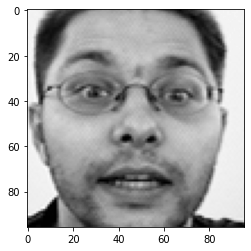

In [18]:
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()

In [19]:
pred = model.predict(X_test)

In [21]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [22]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [23]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [24]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])